# Assignment

## Data Loading

In [69]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(pd.read_excel("Assignment_Data.xlsx")) 

In [70]:
df.head(10)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Target
0,343.33,0.43,215.62,9.19,226.58,2.89,16.58,2.25,250.66
1,324.29,0.13,241.64,6.70,221.23,1.27,14.45,7.00,238.55
2,7.38,0.05,196.16,11.37,222.64,1.58,13.90,7.00,209.16
3,26.42,0.04,256.10,5.90,226.77,0.74,12.44,3.33,250.92
4,65.50,0.40,222.62,6.41,224.75,1.91,14.77,1.94,176.32
5,169.71,0.14,167.88,9.10,196.08,1.83,16.13,5.42,181.76
6,63.50,0.02,256.57,5.41,229.88,1.53,12.33,1.00,244.59
7,108.59,0.12,149.55,3.27,222.31,1.14,13.86,3.08,171.38
8,37.44,0.24,211.23,3.16,216.89,1.52,13.54,1.29,189.64
9,80.53,0.21,231.52,9.68,223.89,1.78,14.20,2.84,218.14


## Data Preprocessing

In [8]:
df.isnull().sum()

Var1      0
Var2      0
Var3      0
Var4      0
Var5      0
Var6      0
Var7      0
Var8      0
Target    0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Var1,9999.0,145.026834,108.120039,0.370,50.970,115.60,228.100,359.37
Var2,9999.0,0.193083,0.109926,0.001,0.110,0.18,0.260,0.69
Var3,9999.0,183.828022,66.033918,0.280,153.505,192.04,223.075,359.82
Var4,9999.0,6.696864,2.789746,0.080,4.650,6.71,8.760,15.73
Var5,9999.0,199.604941,60.846532,0.000,215.730,221.45,225.215,359.76
Var6,9999.0,1.902942,0.660411,0.070,1.430,1.83,2.290,5.27
Var7,9999.0,14.053364,1.922561,5.210,13.130,14.11,15.220,25.00
Var8,9999.0,2.604164,1.914556,1.000,1.260,1.88,2.930,7.00
Target,9999.0,199.844178,52.010529,0.230,178.845,202.94,227.525,359.85


In [10]:
df.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8',
       'Target'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
Var1      9999 non-null float64
Var2      9999 non-null float64
Var3      9999 non-null float64
Var4      9999 non-null float64
Var5      9999 non-null float64
Var6      9999 non-null float64
Var7      9999 non-null float64
Var8      9999 non-null float64
Target    9999 non-null float64
dtypes: float64(9)
memory usage: 703.1 KB


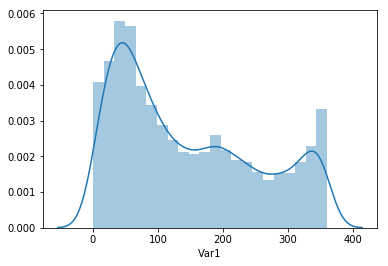

In [12]:
sns.distplot(df['Var1'])

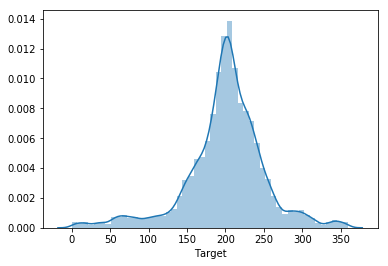

In [13]:
sns.distplot(df['Target'])

Average value of Target variable is between 150 to 250

## Scaling and Train Test Split

In [14]:
X = df.drop('Target',axis=1)
y = df['Target']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train= scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_train.shape 

(6999, 8)

In [22]:
X_test.shape

(3000, 8)

## Creating a Model using rmsprop optimizer

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [49]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [50]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [53]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction; Since it should give final o/p therefore layer is 1
model.add(Dense(1)) 

model.compile(optimizer='rmsprop',loss='mse')

In [54]:
y_train

803     234.09
1387    225.37
921     244.95
5917    228.50
8576    233.54
6225    228.64
6167     64.97
3628    191.35
1199    139.85
6506    244.92
8449    162.23
3674    215.30
2277    217.26
259     276.37
6812    259.35
1451    174.62
1613    259.15
2990    213.46
8240    196.66
1389    242.63
668     205.04
4853    203.49
5591    218.00
2209    268.29
7022    201.64
4283    301.36
1731    257.71
842     128.66
6087    172.15
8794    299.43
         ...  
3807    168.24
5758    192.47
2323    246.07
1273    139.40
9772    175.94
5538    174.82
2107    223.75
2931    149.93
1949    231.80
4467    200.68
9722    187.89
49      230.49
4573    341.48
9100    175.56
7173    184.96
3182    240.22
5824    210.63
6460    205.32
5032    220.40
2623    193.04
5764    214.75
5672    223.78
973     221.51
4079    152.48
6141    191.13
599     196.90
5695    114.70
8006    236.80
1361    297.83
1547    199.92
Name: Target, Length: 6999, dtype: float64

In [31]:
losses = pd.DataFrame(model.history.history)

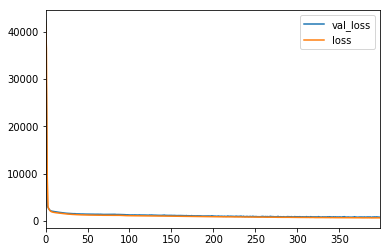

In [32]:
#Comparing loss on training data with val_loss i.e. loss on test data to check overfitting
losses.plot()

In [56]:
model.fit(X_train,y_train.values,epochs=250)

Epoch 1/250
6999/6999 [==============================] - 1s 100us/step - loss: 42160.6965
Epoch 2/250
6999/6999 [==============================] - 0s 48us/step - loss: 41262.0813
Epoch 3/250
6999/6999 [==============================] - 0s 50us/step - loss: 38419.6049
Epoch 4/250
6999/6999 [==============================] - 0s 48us/step - loss: 31558.9327
Epoch 5/250
6999/6999 [==============================] - 0s 67us/step - loss: 19593.3527
Epoch 6/250
6999/6999 [==============================] - 0s 54us/step - loss: 6713.4096
Epoch 7/250
6999/6999 [==============================] - 0s 50us/step - loss: 2829.8834
Epoch 8/250
6999/6999 [==============================] - 0s 45us/step - loss: 2663.9084
Epoch 9/250
6999/6999 [==============================] - 0s 48us/step - loss: 2531.2982
Epoch 10/250
6999/6999 [==============================] - 0s 47us/step - loss: 2419.2228
Epoch 11/250
6999/6999 [==============================] - 0s 45us/step - loss: 2319.4678
Epoch 12/250
6999/6999 [

6999/6999 [==============================] - 0s 65us/step - loss: 1718.7189
Epoch 183/250
6999/6999 [==============================] - 0s 63us/step - loss: 1718.8447
Epoch 184/250
6999/6999 [==============================] - 0s 62us/step - loss: 1718.0117
Epoch 185/250
6999/6999 [==============================] - 0s 66us/step - loss: 1717.9046
Epoch 186/250
6999/6999 [==============================] - 0s 44us/step - loss: 1717.3527
Epoch 187/250
6999/6999 [==============================] - 0s 49us/step - loss: 1716.9405
Epoch 188/250
6999/6999 [==============================] - 0s 48us/step - loss: 1716.7390
Epoch 189/250
6999/6999 [==============================] - 0s 55us/step - loss: 1716.0826
Epoch 190/250
6999/6999 [==============================] - 0s 59us/step - loss: 1715.7191
Epoch 191/250
6999/6999 [==============================] - 0s 46us/step - loss: 1714.5735
Epoch 192/250
6999/6999 [==============================] - 0s 68us/step - loss: 1713.9697
Epoch 193/250
6999/6999 

In [59]:
losses = pd.DataFrame(model.history.history)

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

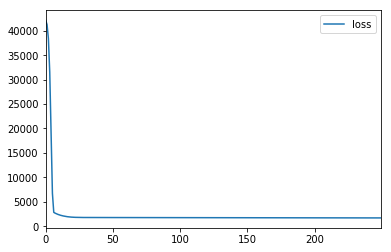

In [60]:
#Comparing loss on training data with val_loss i.e. loss on test data to check overfitting
losses.plot()

In [61]:
# Evaluates the model based on loss function specified (in our case, mse)
training_score = model.evaluate(X_train,y_train,verbose=0) #verbose - 0 since we dont want any o/p
test_score = model.evaluate(X_test,y_test,verbose=0) 

In [62]:
training_score

1683.884011977297

In [63]:
test_score

1899.9878494466145

In [65]:
predictions = model.predict(X_test)

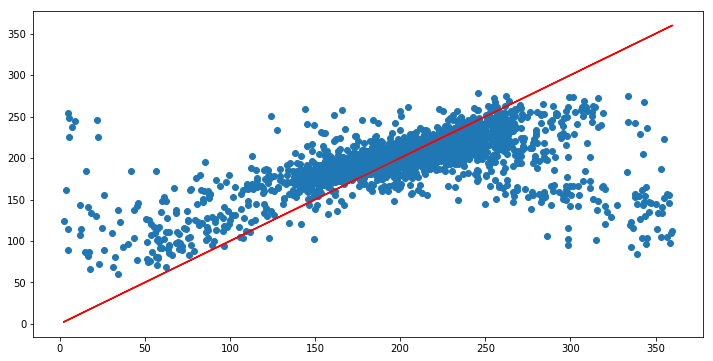

In [66]:
plt.figure(figsize=(12,6))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r') #r is the red line or perfect prediction lines
#Outliers - really expensive houses

In [67]:
errors = y_test.values.reshape(3000, 1) - predictions

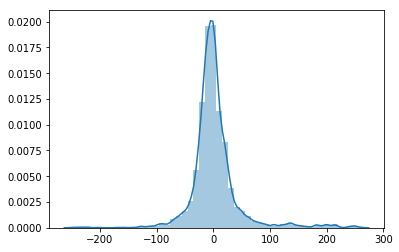

In [68]:
sns.distplot(errors)

## Creating a Model using adam optimizer

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [29]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [30]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400) #Larger a batch size will increase training time but will prevent overfitting of data

Train on 6999 samples, validate on 3000 samples
Epoch 1/400
6999/6999 [==============================] - 1s 88us/step - loss: 42108.1722 - val_loss: 42477.3763
Epoch 2/400
6999/6999 [==============================] - 0s 21us/step - loss: 36487.7644 - val_loss: 25980.4296
Epoch 3/400
6999/6999 [==============================] - 0s 20us/step - loss: 9286.2677 - val_loss: 3145.3177
Epoch 4/400
6999/6999 [==============================] - 0s 19us/step - loss: 2850.1884 - val_loss: 2798.5319
Epoch 5/400
6999/6999 [==============================] - 0s 19us/step - loss: 2518.1427 - val_loss: 2473.2463
Epoch 6/400
6999/6999 [==============================] - 0s 19us/step - loss: 2215.1739 - val_loss: 2268.7868
Epoch 7/400
6999/6999 [==============================] - 0s 20us/step - loss: 2026.5622 - val_loss: 2132.4722
Epoch 8/400
6999/6999 [==============================] - 0s 19us/step - loss: 1918.4040 - val_loss: 2061.1499
Epoch 9/400
6999/6999 [==============================] - 0s 21us/ste

6999/6999 [==============================] - 0s 25us/step - loss: 985.5817 - val_loss: 1146.4694
Epoch 148/400
6999/6999 [==============================] - 0s 27us/step - loss: 986.8921 - val_loss: 1149.6688
Epoch 149/400
6999/6999 [==============================] - 0s 20us/step - loss: 983.6292 - val_loss: 1152.8016
Epoch 150/400
6999/6999 [==============================] - 0s 19us/step - loss: 982.7717 - val_loss: 1137.8245
Epoch 151/400
6999/6999 [==============================] - 0s 21us/step - loss: 980.2161 - val_loss: 1154.1568
Epoch 152/400
6999/6999 [==============================] - 0s 20us/step - loss: 977.7667 - val_loss: 1138.1795
Epoch 153/400
6999/6999 [==============================] - 0s 22us/step - loss: 983.5972 - val_loss: 1129.9792
Epoch 154/400
6999/6999 [==============================] - 0s 26us/step - loss: 971.9794 - val_loss: 1148.6033
Epoch 155/400
6999/6999 [==============================] - 0s 19us/step - loss: 976.0148 - val_loss: 1133.3655
Epoch 156/400
6

6999/6999 [==============================] - 0s 19us/step - loss: 825.4718 - val_loss: 980.9980
Epoch 222/400
6999/6999 [==============================] - 0s 18us/step - loss: 833.4469 - val_loss: 986.0084
Epoch 223/400
6999/6999 [==============================] - 0s 16us/step - loss: 840.6882 - val_loss: 955.4263
Epoch 224/400
6999/6999 [==============================] - 0s 19us/step - loss: 825.9518 - val_loss: 959.7947
Epoch 225/400
6999/6999 [==============================] - 0s 18us/step - loss: 824.3019 - val_loss: 940.0010
Epoch 226/400
6999/6999 [==============================] - 0s 17us/step - loss: 828.6032 - val_loss: 936.7646
Epoch 227/400
6999/6999 [==============================] - 0s 17us/step - loss: 820.7984 - val_loss: 926.7468
Epoch 228/400
6999/6999 [==============================] - 0s 16us/step - loss: 819.2383 - val_loss: 1007.8894
Epoch 229/400
6999/6999 [==============================] - 0s 16us/step - loss: 820.6300 - val_loss: 939.3005
Epoch 230/400
6999/6999

6999/6999 [==============================] - 0s 19us/step - loss: 646.9200 - val_loss: 873.8998
Epoch 370/400
6999/6999 [==============================] - 0s 18us/step - loss: 650.1847 - val_loss: 820.5545
Epoch 371/400
6999/6999 [==============================] - 0s 18us/step - loss: 643.8653 - val_loss: 806.8613
Epoch 372/400
6999/6999 [==============================] - 0s 20us/step - loss: 637.1990 - val_loss: 793.1422
Epoch 373/400
6999/6999 [==============================] - 0s 21us/step - loss: 654.4440 - val_loss: 765.3963
Epoch 374/400
6999/6999 [==============================] - 0s 24us/step - loss: 641.8570 - val_loss: 789.6675
Epoch 375/400
6999/6999 [==============================] - 0s 28us/step - loss: 643.4217 - val_loss: 806.8181
Epoch 376/400
6999/6999 [==============================] - 0s 20us/step - loss: 635.9464 - val_loss: 791.4872
Epoch 377/400
6999/6999 [==============================] - 0s 19us/step - loss: 649.0202 - val_loss: 824.5678
Epoch 378/400
6999/6999 

In [31]:
losses = pd.DataFrame(model.history.history)

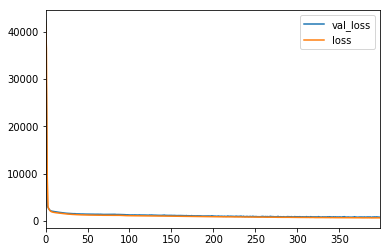

In [32]:
#Comparing loss on training data with val_loss i.e. loss on test data to check overfitting
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [33]:
# Evaluates the model based on loss function specified (in our case, mse)
training_score = model.evaluate(X_train,y_train,verbose=0) #verbose - 0 since we dont want any o/p
test_score = model.evaluate(X_test,y_test,verbose=0) 

In [95]:
training_score

23.91928490774972

In [96]:
test_score

25.710026041666666

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [35]:
X_test = pd.DataFrame(X_test)
X_test[X_test[0]==200] 

,0,1,2,3,4,5,6,7


In [36]:
pd.DataFrame(y_test)

,Target
6676,197.43
6421,308.53
9968,185.48
8491,189.02
9981,224.93
8843,189.92
6798,169.25
5862,199.62
3662,187.27
3457,250.10


In [37]:
predictions = model.predict(X_test)

In [38]:
mean_absolute_error(y_test,predictions)

13.801791062622069

In [39]:
np.sqrt(mean_squared_error(y_test,predictions))

28.598036995864387

In [40]:
explained_variance_score(y_test,predictions)

0.6959609448690722

In [41]:
df['Target'].mean()

199.8441784178418

In [42]:
df['Target'].median()

202.94

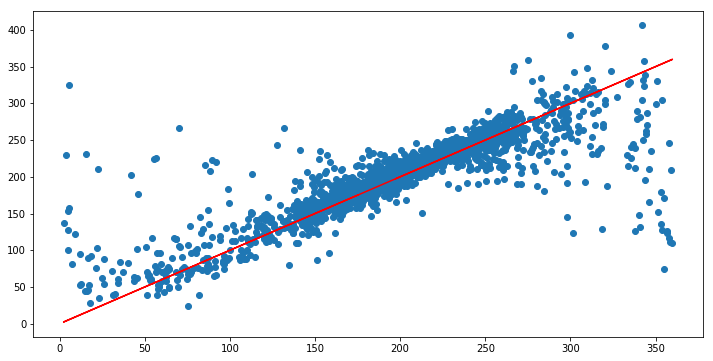

In [43]:
plt.figure(figsize=(12,6))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r') #r is the red line or perfect prediction lines
#Outliers - really expensive houses

In [44]:
errors = y_test.values.reshape(3000, 1) - predictions

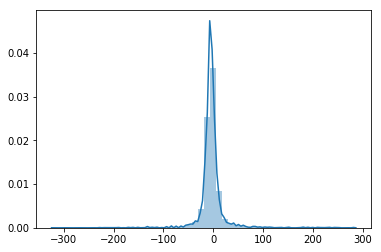

In [45]:
sns.distplot(errors)

In [46]:
df.dropna()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Target
0,343.330,0.430,215.62,9.19,226.58,2.89,16.58,2.25,250.66
1,324.290,0.130,241.64,6.70,221.23,1.27,14.45,7.00,238.55
2,7.380,0.050,196.16,11.37,222.64,1.58,13.90,7.00,209.16
3,26.420,0.040,256.10,5.90,226.77,0.74,12.44,3.33,250.92
4,65.500,0.400,222.62,6.41,224.75,1.91,14.77,1.94,176.32
5,169.710,0.140,167.88,9.10,196.08,1.83,16.13,5.42,181.76
6,63.500,0.020,256.57,5.41,229.88,1.53,12.33,1.00,244.59
7,108.590,0.120,149.55,3.27,222.31,1.14,13.86,3.08,171.38
8,37.440,0.240,211.23,3.16,216.89,1.52,13.54,1.29,189.64
9,80.530,0.210,231.52,9.68,223.89,1.78,14.20,2.84,218.14


---
### Predicting on a test data

In [ ]:
single_item = df.drop('Target',axis=1).iloc[0]

In [ ]:
single_item = scaler.transform(single_item.values.reshape(-1, 8))

In [ ]:
single_item

In [ ]:
model.predict(single_item)

In [ ]:
df.iloc[0]

In [ ]:
single_item = df.drop('Target',axis=1).iloc[1]

In [ ]:
single_item = scaler.transform(single_item.values.reshape(-1, 8))

In [ ]:
single_item

In [ ]:
model.predict(single_item)

In [ ]:
df[['Var1','Target']].corr()

In [ ]:
df[['Var2','Target']].corr()

In [ ]:
df[['Var3','Target']].corr()

In [ ]:
df[['Var4','Target']].corr()

In [ ]:
df[['Var5','Target']].corr()

In [ ]:
df[['Var6','Target']].corr()

In [ ]:
df[['Var7','Target']].corr()

In [ ]:
df[['Var8','Target']].corr()

In [ ]:
df[['Var8','Target']].corr().plot()

In [ ]:
sns.pairplot(df)

In [ ]:
sns.distplot(df['Target'])

In [ ]:
sns.heatmap(df.corr())

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Target column. 

### X and y arrays

In [104]:
X = df[['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8']]
y = df['Target'].values
y


array([250.66, 238.55, 209.16, ..., 188.16, 163.13, 171.12])

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [59]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
lm = LinearRegression()

In [117]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [118]:
# print the intercept
print(lm.intercept_)

111.16188774990374


In [119]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Var1,0.044918
Var2,-42.912788
Var3,0.376688
Var4,-1.662547
Var5,0.161340
Var6,8.637083
Var7,-1.235139
Var8,0.161256


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [71]:
predictions = lm.predict(X_test)

NameError: name 'lm' is not defined

In [72]:
from sklearn.model_selection import GridSearchCV

Grid Saerch CV takes in a dictionary that describes the parameters that should be tried and a model to train
The keys are the parameters to test and the values are the settings to take while testing

In [73]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [74]:
grid = GridSearchCV(LinearRegression(),param_grid,verbose = 3) 
#Passing SVC as esimator
#SVC - Support Vector Classifier

NameError: name 'LinearRegression' is not defined

In [125]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter C for estimator LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False). Check the list of available parameters with `estimator.get_params().keys()`.

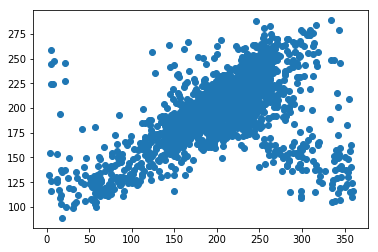

In [111]:
plt.scatter(y_test,predictions)

**Residual Histogram**

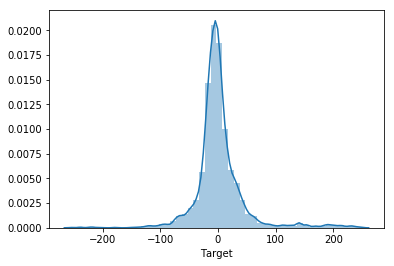

In [95]:
sns.distplot((y_test-predictions),bins=50);

In [96]:
from sklearn import metrics

In [97]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 25.647343307449976
MSE: 1953.44664150536
RMSE: 44.197812632588054


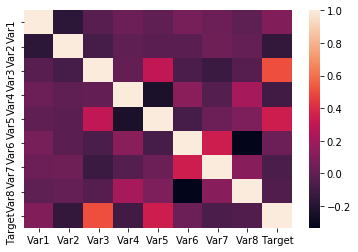

In [98]:
sns.heatmap(df.corr())

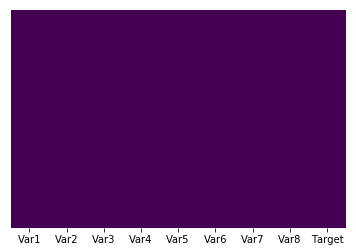

In [99]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [100]:
len(predictions)

3000

In [101]:
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y_test, predictions)

0.26384308429286907

### Exploratory Data Analysis

In [1]:
sns.countplot(x='Target',data = df)

NameError: name 'sns' is not defined

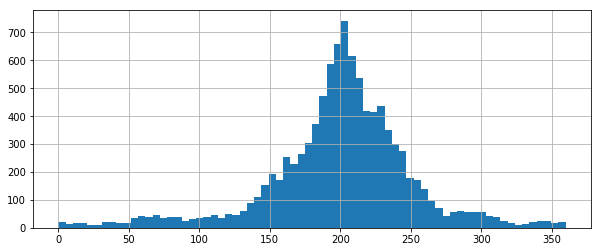

In [3]:
plt.figure(figsize=(10,4))
df['Target'].hist(bins=70)

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### KNN

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(df.drop('Target',axis = 1)) #fitting all feature columns to scaler object

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_features = scaler.transform(df.drop('Target',axis = 1))
# Transform performs standardization by centering and scaling

In [19]:
scaled_features

array([[ 1.83419359,  2.15535056,  0.4814733 , ...,  1.49468612,
         1.31426864, -0.18499441],
       [ 1.65808422, -0.5738972 ,  0.87553293, ..., -0.95845466,
         0.20631618,  2.29612281],
       [-1.27315637, -1.3016966 ,  0.18676152, ..., -0.48902649,
        -0.07977483,  2.29612281],
       ...,
       [ 1.64883478, -0.5738972 , -0.25121713, ..., -0.48902649,
         0.20631618,  0.17019711],
       [ 0.31173547,  0.69975176, -1.09809701, ..., -0.29216951,
         0.25313107, -0.29468591],
       [ 1.68592504, -0.39194735, -1.18835817, ...,  0.02583022,
         0.48200388, -0.83791999]])

In [20]:
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])

In [21]:
df_feat.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8
0,1.834194,2.155351,0.481473,0.893723,0.443352,1.494686,1.314269,-0.184994
1,1.658084,-0.573897,0.875533,0.001124,0.355421,-0.958455,0.206316,2.296123
2,-1.273156,-1.301697,0.186762,1.675195,0.378595,-0.489026,-0.079775,2.296123
3,-1.097047,-1.392672,1.094522,-0.285654,0.446474,-1.761025,-0.839216,0.379133
4,-0.735579,1.882426,0.587485,-0.102833,0.413274,0.010687,0.372769,-0.346920


Now, we have standardized version of our data. Since K Means relies on distance between features, we need to standardize data first

In [22]:
from sklearn.model_selection import train_test_split

In [66]:
X = df_feat
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=101) #test_size - 0.3

NameError: name 'df_feat' is not defined

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)
#n_neighbor is the number of neighbour we want for this model = k

In [26]:
knn.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

### K Means

In [3]:
from sklearn.cluster import KMeans

In [4]:
kmeans = KMeans(n_clusters = 4) #since we specified in the dataset 4 centers

In [5]:
kmeans_predictions = kmeans.fit_predict(df[['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8']])

### Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [39]:
X, y = df(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

TypeError: 'DataFrame' object is not callable

In [6]:
kmeans.cluster_centers_

array([[3.12748319e+02, 1.63493862e-01, 1.81676553e+02, 6.84593484e+00,
        2.05751251e+02, 1.96889518e+00, 1.41436402e+01, 2.59904627e+00],
       [5.34174183e+01, 2.12421253e-01, 1.91829385e+02, 6.42060626e+00,
        2.19445553e+02, 1.84246309e+00, 1.40179284e+01, 2.66602908e+00],
       [1.77937899e+02, 1.79313205e-01, 1.93496365e+02, 6.49866345e+00,
        2.18473474e+02, 1.94396940e+00, 1.40876530e+01, 2.59505636e+00],
       [1.15370841e+02, 2.04336570e-01, 1.24253646e+02, 8.21948220e+00,
        3.93300216e+01, 1.93394822e+00, 1.39260949e+01, 2.34195254e+00]])

In [7]:
kmeans.labels_

array([0, 0, 1, ..., 0, 2, 0], dtype=int32)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
y

dtype('float64')

In [32]:
kmeans_predictions = pd.Series(kmeans_predictions,dtype = 'float64')

In [33]:
kmeans_predictions.dtype

dtype('float64')

In [34]:
print(confusion_matrix(y,kmeans_predictions))

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

### Support Vector Machine

In [41]:
from sklearn.svm import SVC

In [42]:
model = SVC(gamma = 'auto')

In [43]:
model.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

C controls the cost of misclassifications on the training data; Large C gives low bias and high variance; With a smaller C value, Low bias because we penalise the cost of misclassfication a lot for larger C value. With a smaller C value,we are not gonnna penalise that cost as much so it gives higher bias and lower variance. <br>
Gamma parameter is the free parameter with radio basis function(rbf). Small gamma means a gaussian of a large variance. A large gamma value leads to high bias and low variance and vice versa implying Gamma is large, variance is small implying that support vector does not have a wide spread influence.


In [14]:
npredictions = model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

NameError: name 'predictions' is not defined

In [17]:
from sklearn.model_selection import GridSearchCV

Grid Saerch CV takes in a dictionary that describes the parameters that should be tried and a model to train
The keys are the parameters to test and the values are the settings to take while testing

In [18]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [19]:
grid = GridSearchCV(SVC(),param_grid,verbose = 3) 
#Passing SVC as esimator
#SVC - Support Vector Classifier

In [20]:
grid.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0

[CV] .... C=100, gamma=0.0001, score=0.9774436090225563, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .... C=100, gamma=0.0001, score=0.9393939393939394, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ......... C=1000, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ......... C=1000, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.6363636363636364, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ....... C=1000, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ....... C=1000, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

It's going to run the same loop with cross-validation to find the best parameter combination.

Once it has the best combination, it runs fit again on all data passed to that fit, without cross-validation, to build a single new model, using the best parameter setting.

In [23]:
#Grab the parameters with best cross validation score
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [24]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
grid_predictions = grid.predict(X_test)

In [28]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 60   6]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        66
           1       0.94      0.97      0.96       105

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
scaler.fit(X_train,y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
scaled_data = scaler.transform(X_test) #Apply the rotation in dimensionality reduction

In [54]:
#PCA
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components = 2)

In [56]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [57]:
x_pca = pca.transform(scaled_data)

In [58]:
scaled_data.shape

(3000, 8)

In [61]:
x_pca.shape

(3000, 2)

Text(0, 0.5, 'Second Principal Component')

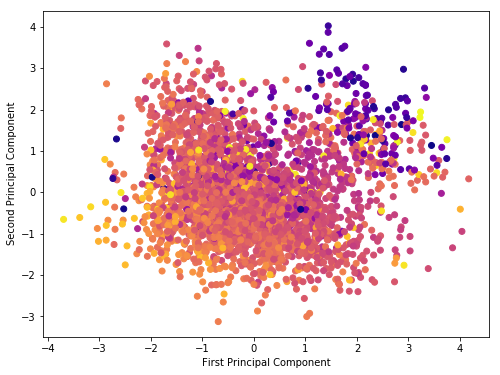

In [70]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_test,cmap = 'plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Dimensionality Reduction : We are doing with 2 columns of data instead of 8 columns of data

In [73]:
pca.components_

array([[ 0.14000181,  0.04997144, -0.39232886,  0.29845329, -0.52432416,
         0.55201751,  0.33633921, -0.20528719],
       [-0.26010306,  0.31419823, -0.24394422,  0.39833279, -0.39970736,
        -0.416987  , -0.22039326,  0.48293971]])

Each row represent a principal component and each column relates back to features

In [85]:
df_comp = pd.DataFrame(pca.components_,columns = df.columns[:8])

In [86]:
df_comp

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8
0,0.140002,0.049971,-0.392329,0.298453,-0.524324,0.552018,0.336339,-0.205287
1,-0.260103,0.314198,-0.243944,0.398333,-0.399707,-0.416987,-0.220393,0.482940


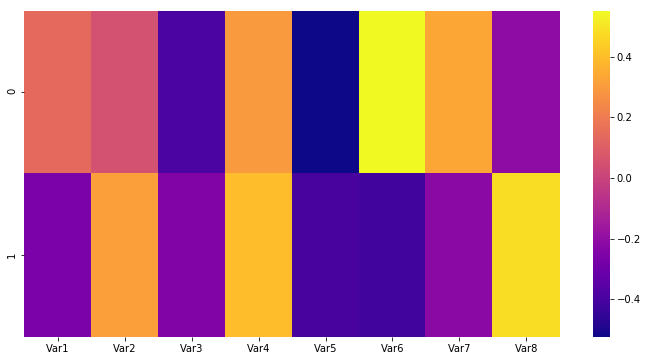

In [87]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

Each principal component here is shown as a row and the higher the number (or hotter the color) it is more correlated to specific feature in the column